# Gensim word vector visualization of various word vectors 

In [2]:
# get the interactive tools for Matplotlib 
%matplotlib notebook

import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 
import gensim

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Load Google's pre-trained Word2Vec model.
model = KeyedVectors.load_word2vec_format('..\\..\\..\\Datasets\\GoogleNews-vectors-negative300.bin', binary=True)  


In [4]:
# Access vectors for specific words with a keyed lookup: 
vector = model['easy']
# See shape of the vector (300,) 
print(vector.shape)

# Preprocessing sentences is not a simple as with spaCy: 
vectors = [model[x] for x in "This is some text I am processing with spacy".split(' ')]
print(vectors[0])


(300,)
[-0.2890625   0.19921875  0.16015625  0.02526855 -0.23632812  0.10205078
  0.06640625 -0.16503906  0.12597656  0.22070312  0.05517578 -0.28710938
 -0.02148438  0.05541992  0.01574707  0.29296875  0.19433594 -0.01531982
  0.03955078 -0.21484375  0.00994873  0.16015625  0.07958984 -0.05932617
  0.12353516 -0.27148438 -0.10205078  0.078125   -0.07519531  0.22363281
  0.16210938 -0.04614258  0.12304688  0.07275391  0.25        0.0072937
 -0.38867188  0.10644531  0.20996094  0.06103516  0.10107422  0.16894531
 -0.15429688 -0.08251953  0.06542969 -0.12255859 -0.11621094  0.04248047
  0.08251953  0.09716797 -0.05371094  0.125       0.15039062 -0.09228516
  0.23925781  0.15234375  0.1796875  -0.26171875  0.15429688  0.09619141
 -0.30859375 -0.05224609 -0.18652344 -0.24414062 -0.0612793  -0.12695312
  0.14160156 -0.03295898  0.03759766 -0.09863281  0.07324219 -0.046875
  0.08203125  0.02441406  0.11425781  0.05200195  0.02685547  0.04931641
  0.11035156  0.44921875  0.07519531 -0.0683593

In [7]:
model.most_similar('obama')

[('mccain', 0.7319012880325317),
 ('hillary', 0.7284600138664246),
 ('obamas', 0.7229631543159485),
 ('george_bush', 0.7205674648284912),
 ('barack_obama', 0.7045838832855225),
 ('palin', 0.7043113708496094),
 ('clinton', 0.6934449672698975),
 ('clintons', 0.6816834807395935),
 ('sarah_palin', 0.6815144419670105),
 ('john_mccain', 0.6800708770751953)]

In [8]:
model.most_similar('banana')

[('bananas', 0.7523775696754456),
 ('pineapple', 0.6587538123130798),
 ('mango', 0.6365211606025696),
 ('pineapples', 0.6313878297805786),
 ('papaya', 0.6063666343688965),
 ('coconut', 0.6035483479499817),
 ('potato', 0.5747568607330322),
 ('melon', 0.5625776052474976),
 ('cashew', 0.562165379524231),
 ('tomato', 0.5590205788612366)]

In [9]:
model.most_similar(negative=['banana'])

[('NORWALK_CONN', 0.23768547177314758),
 ('JIM_HANNON_TimesDaily', 0.2376764565706253),
 ('KITCHENER_ONTARIO', 0.23705117404460907),
 ('DENVER_CO_PRWEB', 0.23474794626235962),
 ('GRANDE_BAY_MAURITIUS', 0.2316431701183319),
 ('Dr._Parviz_Azar', 0.22826240956783295),
 ('HuMax_IL8_TM', 0.22697213292121887),
 ('subsidiary_Airstar', 0.22571393847465515),
 ('AB_OMX_Stockholm', 0.2248857617378235),
 ('MotoTron_electronic_controls', 0.22116822004318237)]

In [11]:
# Inferences in word space
result = model.most_similar(positive=['woman','king'], negative=['man'])
print("{} : {:.4f}".format(*result[0]))

queen : 0.7118


In [12]:
# create a function to calculate analogy 
def analogy(x1, x2, y1): 
    result =model.most_similar(positive=[y1,x2], negative=[x1])
    return result[0][0]

In [13]:
print(analogy('walk','walking','run'))
print(analogy('white','dark','up'))
print(analogy('Canada','great','USA'))
print(analogy('madrid','spain','paris'))

running
down
terrific
france


In [14]:
# show which word doesn't match 
print(model.doesnt_match( list("breakfast cereal dinner lunch".split()) ))

cereal


C:\Users\jairp\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [15]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


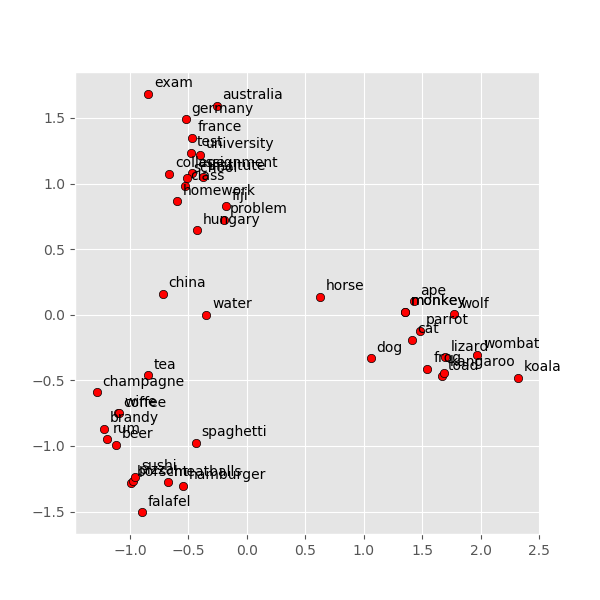

In [16]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


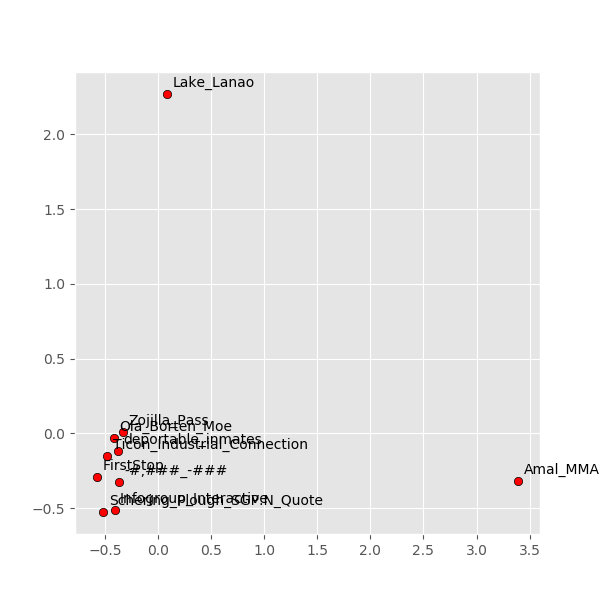

In [26]:
display_pca_scatterplot(model, sample=10)

# Word Embeddings in Python with Spacy and Gensim

## Pre-trained models in Spacy 

Spacy has different models of different sizes for use for different languages. 

In [27]:
import spacy 

# Load the spacy model 
nlp = spacy.load('en_core_web_md')

In [28]:
# process a sentence using the model 
doc = nlp("This is some sentence that I am processing with Spacy")

# It's that simple, all of the vectors and words are asisgned at this point  
print(doc[3].vector) 

# Get the masn vector forthe entire sentence  (useful for sentence classification etc)
print(doc.vector)

[-2.3011e-01  2.4952e-01 -4.0514e-01  1.0115e-01 -8.3443e-02 -1.3674e-01
  1.1430e-01  2.6823e-02  1.9863e-01  2.4560e+00  1.4029e-01  5.8672e-01
 -7.3874e-02  2.8157e-01 -5.2304e-01 -4.8468e-02  9.3938e-02  3.2116e-01
  1.6802e-01 -3.4201e-01 -1.7691e-01 -3.3228e-01  5.5155e-01  3.9018e-01
  5.8627e-02 -3.4466e-01  2.8707e-01 -4.0180e-01  5.6514e-01 -1.8354e-01
 -4.9021e-01  2.9733e-01  1.6541e-02 -2.0908e-01 -4.1405e-03  1.5026e-02
  4.1316e-01 -5.1856e-01 -7.6071e-01  1.5410e-02  3.3912e-01 -4.6425e-01
  5.1580e-01 -6.6322e-01  3.4102e-01 -5.6523e-01 -2.6071e-01  2.8103e-01
  2.0327e-01  4.3297e-01 -4.6510e-01  4.5241e-01  3.7734e-01  2.7927e-01
 -9.1755e-02  2.7468e-01  8.7426e-02 -1.2578e-01 -1.8227e-01 -3.1709e-02
 -1.7394e-01  4.5712e-03  2.3133e-02  1.1350e-01 -2.0091e-01  1.0224e-01
 -8.9016e-01  2.0097e-01  1.0257e-01  2.9031e-01 -2.7940e-02 -4.1125e-01
 -4.6933e-02 -5.2750e-01 -4.9433e-01 -4.9615e-01 -1.4444e-01 -1.4234e-01
 -5.1696e-01  1.7736e-01 -7.2752e-02 -7.9489e-03 -1

 -1.00279905e-01 -3.74539499e-03 -1.62513584e-01  2.11121276e-01]


## Pre-trained models in Gensim 

Gensim doesn't come with the same built-in models, but can used pretrained ones. 

In [29]:
from gensim.models import KeyedVectors

# Load vectors directly from the file (300 Dimensions)
model = KeyedVectors.load_word2vec_format('..\\..\\..\\Datasets\\GoogleNews-vectors-negative300.bin', binary=True)  

In [30]:
# Access vectors for specific words with a keyed lookup: 
vector = model['easy'] 
# see the shape of the vector 
print(vector.shape)

# Processing sentences: 
vectors = [model[x] for x in "This is some text I am processing with Spacy".split(' ')]

(300,)


We can then examine things such as similarity

In [31]:
model.similarity('straightforward','easy')

0.5717044

In [32]:
model.similarity('simple','impossible')

0.2915616

In [33]:
# get synonyms in word vector space! 
model.most_similar('simple')

[('straightforward', 0.7460168600082397),
 ('Simple', 0.7108173966407776),
 ('uncomplicated', 0.6297484636306763),
 ('simplest', 0.6171397566795349),
 ('easy', 0.5990299582481384),
 ('fairly_straightforward', 0.5893307328224182),
 ('deceptively_simple', 0.5743066072463989),
 ('simpler', 0.5537199378013611),
 ('simplistic', 0.5516539216041565),
 ('disarmingly_simple', 0.5365327000617981)]

## Create Custom Word Embeddings 

We can train our own models, so we can use an API to the Google word2vec algorithm. 


In [21]:
# Import libraries to build Word2Vec model, and load Newsgroup data 
import os 
import sys
import re
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phrases
DATA_DIR = '..\\..\\..\\Datasets\\20_newsgroups' 

# Want to have this format: 
input_data = [['This', 'is', 'sentence', 'one'], 
              ['And', 'this', 'is', 'sentence', 'two']]

In [22]:
# Newsgroups data is split between many files and folders. 
# Directory structure 20_newsgroups/<newsgroup label>/<post ID> 

texts = []  # list of text samples 
labels_index = {} # dictionary mapping label name to numeric id 
labels = [] # list of label ids 
label_text = [] # list of label texts 

# Go through each directory 
for name in sorted(os.listdir(DATA_DIR)): 
    path = os.path.join(DATA_DIR, name) 
    if os.path.isdir(path): 
        label_id = len(labels_index)
        labels_index[name] = label_id 
        for fname in sorted(os.listdir(path)): 
            # News groups posts are named as numbers, with no extensions. 
            if fname.isdigit(): 
                fpath = os.path.join(path, fname)
                f = open(fpath, encoding='latin-1')
                t = f.read()
                i = t.find('\n\n') # skip header in file 
                if 0 < i: 
                    t = t[i:]
                texts.append(t)
                f.close()
                labels.append(label_id)
                label_text.append(name)
                
print('Found %s texts.' % len(texts))    
                    

Found 19997 texts.


In [23]:
# Cleaning data - remove punctuation from every newsgroup text 
sentences = [] 

# Go through each text in turn 
for ii in range(len(texts)): 
    sentences = [re.sub(pattern=r'[\!"#$%&\*+,-./:;<=>?@^_`()|~=]', 
                       repl='', string=x).split(' ') for x in texts[ii].split('\n')]
    sentences = [x for x in sentences if x != ['']] 
    texts[ii] = sentences 

Each original document is now represented in the list "texts", as a list of sentences, 
and each sentence is a list of words. 

In [24]:
# Exmaple output 
print(texts[6])

[['arromdeejyusenkyoucsjhuedu', 'Ken', 'Arromdee', 'writes'], ['The', 'motto', 'originated', 'in', 'the', 'StarSpangled', 'Banner', '', 'Tell', 'me', 'that', 'this', 'has'], ['something', 'to', 'do', 'with', 'atheists'], ['The', 'motto', 'oncoins', 'originated', 'as', 'a', 'McCarthyite', 'smear', 'which', 'equated', 'atheism'], ['with', 'Communism', 'and', 'called', 'both', 'unamerican'], ['No', 'it', "didn't", '', 'The', 'motto', 'has', 'been', 'on', 'various', 'coins', 'since', 'the', 'Civil', 'War'], ['It', 'was', 'just', 'required', 'to', 'be', 'on', 'all', 'currency', 'in', 'the', "50's"], ['keith']]


In [25]:
# Finally, combine all the sentences from every document into a single list 
# of sentences. 

all_sentences = [] 
for text in texts: 
    all_sentences += text 

## Phrase Detection using Gensim Phraser 

In [26]:
from gensim.models.phrases import Phrases, Phraser

# Give some common terms that can be ignored in phrase detection 
# for example, 'state_od_affairs' will be detected because 'of' is provided here: 
common_terms = ["of", "with", "without", "and", "or", "the", "a"]

# Create the relevant phrases from the list of sentences: 
phrases = Phrases(all_sentences, common_terms=common_terms)

# The Phrasesr object is used from now on to transform sentences 
bigram = Phraser(phrases)


In [27]:
len(all_sentences)

606692

In [28]:
print(all_sentences[5676])

['If', 'anything', 'the', 'BSA', 'has', 'taught', 'me', 'I', "don't", 'know', 'tolerance', 'or', 'something']


In [29]:
print(bigram[all_sentences[5676]])

['If', 'anything', 'the', 'BSA', 'has', 'taught', 'me', 'I', "don't_know", 'tolerance', 'or', 'something']


In [30]:
# Apply the Phraser to transform our sentences
all_sentences = list(bigram[all_sentences])

## Creating the Word Embeddings using WOrd2Vec

In [31]:
model  = Word2Vec(all_sentences, 
                 min_count=3,  # Ignore words that appear less than this
                 size=200,   # Dimensionality of word embeddings
                 workers=2, # Number of processors (parallelisation)
                 window=5, # Context window for words during training
                 iter=30 ) # Number of epochs training over corpus

Note this is a toy example, but it shows how we can train a custom model. 

In [32]:
model

In [33]:
# Word embedding dimensions 
model.vector_size

200

In [34]:
# Total number of words in model 
len(model.wv.vocab)

85137

In [35]:
model.most_similar("New_York")

C:\Users\jairp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Los_Angeles', 0.5045047998428345),
 ('Virginia', 0.48632219433784485),
 ('Florida', 0.4697434902191162),
 ('England', 0.44670331478118896),
 ('City', 0.44317248463630676),
 ('California', 0.42981183528900146),
 ('anytime_soon', 0.4159506857395172),
 ('Houston', 0.4131413996219635),
 ('Quebec', 0.4124327301979065),
 ('Texas', 0.41002482175827026)]

In [36]:
model.most_similar('engine')

C:\Users\jairp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('car', 0.5387741327285767),
 ('motor', 0.4949941039085388),
 ('battery', 0.48197633028030396),
 ('bike', 0.4642517566680908),
 ('fluid', 0.46274814009666443),
 ('clutch', 0.46201255917549133),
 ('unit', 0.4555809497833252),
 ('odometer', 0.4512038826942444),
 ('drive', 0.44385790824890137),
 ('torque', 0.4409945607185364)]

In [1]:
# Save wird2vec model  
model.wv.save_word2vec_format('newsgroups_model.bin')

# Load the model 
model = Word2Vec.load('newsgroups_model.bin')

NameError: name 'model' is not defined

In [ ]:
# get the interactive tools for Matplotlib 

import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 

from sklearn.decomposition import PCA

X = model[model.wv.vocab] # Obtain the vectors 
pca = PCA(n_components=2)  # Plot to 2 dimensions
result = pca.fit_transform(X) # fit transform  


In [ ]:
# plot
plt.figure(0)
plt.scatter(result[:, 0],result[:, 1])
plt.show()

# label 
words = list(model.wv.vocab) 
for i, word in range(10): 
    plt.annotate(word, xy=(result[i,0],result[i,1]))